In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [2]:
dataset = pd.read_csv("/kaggle/input/student-performance-bd/bd_students_per_v2.csv")

In [3]:
print("Dataset Preview:")
print(dataset.head())

Dataset Preview:
   id         full_name  age  gender location  family_size mother_education  \
0   2        Avi Biswas   16    Male    Urban            6              SSC   
1   3   Taslima Sultana   18  Female    Rural            6              SSC   
2   4  Md Adilur Rahman   15    Male    Rural            4              SSC   
3   5       Saleh Ahmed   16    Male    Rural            6              SSC   
4   6         Din Islam   17    Male    Urban            5           Honors   

  father_education mother_job father_job  ... tutoring school_type attendance  \
0              HSC         No         No  ...      Yes     Private         95   
1              HSC         No        Yes  ...       No   Semi_Govt         92   
2              SSC        Yes        Yes  ...      Yes        Govt         81   
3              SSC        Yes        Yes  ...      Yes     Private         90   
4          Masters         No        Yes  ...      Yes   Semi_Govt         75   

   extra_curricular_a

In [4]:
print("\nDataset Shape:", dataset.shape)


Dataset Shape: (8612, 24)


In [5]:
print("\nMissing Values:")
print(dataset.isnull().sum())


Missing Values:
id                              0
full_name                       0
age                             0
gender                          0
location                        1
family_size                     0
mother_education               10
father_education                4
mother_job                      0
father_job                      0
guardian                        0
parental_involvement            0
internet_access                 0
studytime                       0
tutoring                        0
school_type                     0
attendance                      0
extra_curricular_activities     0
english                         0
math                            0
science                         0
social_science                  0
art_culture                     0
stu_group                       0
dtype: int64


In [6]:
df = pd.DataFrame(dataset)

In [7]:
df

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
0,2,Avi Biswas,16,Male,Urban,6,SSC,HSC,No,No,...,Yes,Private,95,Yes,95,98,92,94,98,Science
1,3,Taslima Sultana,18,Female,Rural,6,SSC,HSC,No,Yes,...,No,Semi_Govt,92,No,65,71,40,78,80,Commerce
2,4,Md Adilur Rahman,15,Male,Rural,4,SSC,SSC,Yes,Yes,...,Yes,Govt,81,Yes,64,78,58,86,74,Commerce
3,5,Saleh Ahmed,16,Male,Rural,6,SSC,SSC,Yes,Yes,...,Yes,Private,90,Yes,84,90,85,86,88,Science
4,6,Din Islam,17,Male,Urban,5,Honors,Masters,No,Yes,...,Yes,Semi_Govt,75,Yes,54,70,45,79,76,Commerce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,8609,Elina Khanam,17,Female,City,5,HSC,Non_Educated,No,No,...,No,Govt,78,Yes,81,83,80,84,91,Science
8608,8610,Sadiq Ghosh,16,Male,City,2,SSC,Under_SSC,No,Yes,...,No,Private,73,No,95,100,96,98,98,Science
8609,8611,Arman Amin,18,Male,City,3,Diploma,SSC,No,No,...,Yes,Private,51,No,45,59,41,51,69,Arts
8610,8612,Tawhidul Saif,15,Male,Urban,5,Honors,HSC,No,No,...,No,Private,66,Yes,59,65,60,68,69,Arts


In [8]:
# Remove rows with missing values
df_cleaned = dataset.dropna()

In [9]:
# Verify no missing values remain
print("\nMissing Values After Cleaning:")
print(df_cleaned.isnull().sum())


Missing Values After Cleaning:
id                             0
full_name                      0
age                            0
gender                         0
location                       0
family_size                    0
mother_education               0
father_education               0
mother_job                     0
father_job                     0
guardian                       0
parental_involvement           0
internet_access                0
studytime                      0
tutoring                       0
school_type                    0
attendance                     0
extra_curricular_activities    0
english                        0
math                           0
science                        0
social_science                 0
art_culture                    0
stu_group                      0
dtype: int64


In [10]:
df = df_cleaned

In [11]:
categorical_columns = ['gender', 'stu_group']

In [12]:
# One-Hot Encode categorical columns
df_pandas_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [13]:
print("\nEncoded Dataset Preview:")
print(df_pandas_encoded.head())


Encoded Dataset Preview:
   id         full_name  age location  family_size mother_education  \
0   2        Avi Biswas   16    Urban            6              SSC   
1   3   Taslima Sultana   18    Rural            6              SSC   
2   4  Md Adilur Rahman   15    Rural            4              SSC   
3   5       Saleh Ahmed   16    Rural            6              SSC   
4   6         Din Islam   17    Urban            5           Honors   

  father_education mother_job father_job guardian  ... attendance  \
0              HSC         No         No   Father  ...         95   
1              HSC         No        Yes   Father  ...         92   
2              SSC        Yes        Yes   Father  ...         81   
3              SSC        Yes        Yes   Father  ...         90   
4          Masters         No        Yes   Father  ...         75   

  extra_curricular_activities  english math science  social_science  \
0                         Yes       95   98      92          

In [14]:

# Custom mapping
custom_mapping = {'Non_Educated':0,'Under_SSC':1,'SSC':2,'HSC':3 ,'Diploma':4,'Honors':5,'Hons':5 ,'Masters':6}

# Apply the mapping
df_pandas_encoded['mother_education'] = df_pandas_encoded['mother_education'].map(custom_mapping)

#Apply Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_pandas_encoded['mother_education'] = encoder.fit_transform(df_pandas_encoded['mother_education'])
print(df_pandas_encoded['mother_education'] )

0       2
1       2
2       2
3       2
4       5
       ..
8607    3
8608    2
8609    4
8610    5
8611    4
Name: mother_education, Length: 8599, dtype: int64


In [15]:
# Custom mapping
custom_mapping = {'Non_Educated':0,'Under_SSC':1,'SSC':2,'HSC':3 ,'Diploma':4,'Honors':5,'Hons':5 ,'Masters':6}

# Apply the mapping
df_pandas_encoded['father_education'] = df_pandas_encoded['father_education'].map(custom_mapping)

#Apply Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_pandas_encoded['father_education'] = encoder.fit_transform(df_pandas_encoded['father_education'])
print(df_pandas_encoded['father_education'] )

0       3
1       3
2       2
3       2
4       6
       ..
8607    0
8608    1
8609    2
8610    3
8611    1
Name: father_education, Length: 8599, dtype: int64


In [16]:
# Apply Label Encoding to any remaining categorical or boolean columns
encoder = LabelEncoder()
df_encoded = df_pandas_encoded.apply(
    lambda col: encoder.fit_transform(col) if (col.dtype == 'object' or col.dtype == 'bool') else col)

#encoder = LabelEncoder()

# Apply LabelEncoder to all columns except the first two
#df_encoded = df_pandas_encoded.apply(
   # lambda col: encoder.fit_transform(col) if (col.dtype in ['object', 'bool'] and col.name not in df_pandas_encoded.columns[:2]) else col
#)

In [17]:
# Verify the encoded dataset
print("\nFully Encoded Dataset Preview:")
print(df_encoded.head())


Fully Encoded Dataset Preview:
   id  full_name  age  location  family_size  mother_education  \
0   2        602   16         2            6                 2   
1   3       6366   18         1            6                 2   
2   4       3563   15         1            4                 2   
3   5       5433   16         1            6                 2   
4   6       1142   17         2            5                 5   

   father_education  mother_job  father_job  guardian  ...  attendance  \
0                 3           0           0         0  ...          95   
1                 3           0           1         0  ...          92   
2                 2           1           1         0  ...          81   
3                 2           1           1         0  ...          90   
4                 6           0           1         0  ...          75   

   extra_curricular_activities  english  math  science  social_science  \
0                            1       95    98       

In [18]:
df_encoded# Display the data types of a sample column to confirm encoding
print("\nData Type of 'gender_Male':", df_pandas_encoded['gender_Male'].dtype)


Data Type of 'gender_Male': bool


In [19]:
# Select features for clustering
features_for_clustering = [
    'location', 'mother_job', 'father_job', 'parental_involvement',
    'internet_access', 'studytime', 'tutoring', 'attendance', 
    'extra_curricular_activities', 'english', 'math', 'science', 
    'social_science', 'art_culture' 
]

In [20]:
X = df_encoded[features_for_clustering]

In [21]:

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.75, min_samples=10)  # Adjust eps and min_samples as needed
df_encoded['cluster'] = dbscan.fit_predict(X_scaled)

In [23]:
# --- Analyze the clusters ---

# Number of clusters (excluding noise points labeled as -1)
n_clusters_ = len(set(df_encoded['cluster'])) - (1 if -1 in df_encoded['cluster'] else 0)
print(f"Number of clusters: {n_clusters_}")

Number of clusters: 3


In [24]:
# Calculate cluster means (including noise points for analysis)
cluster_means = df_encoded.groupby('cluster').mean()
print(cluster_means)

                  id    full_name        age  location  family_size  \
cluster                                                               
-1       4306.597130  3549.946681  16.613114  1.053203     4.498308   
 0       3276.294118  4450.117647  17.235294  0.000000     5.176471   
 1       7209.454545  3923.545455  16.181818  0.000000     5.090909   

         mother_education  father_education  mother_job  father_job  guardian  \
cluster                                                                         
-1               2.986699          3.117606    0.479874    0.558278  0.944581   
 0               3.117647          4.941176    0.000000    1.000000  0.705882   
 1               3.727273          4.181818    1.000000    1.000000  1.454545   

         ...  attendance  extra_curricular_activities    english       math  \
cluster  ...                                                                  
-1       ...   73.967565                     0.530977  73.586863  72.905962   
 

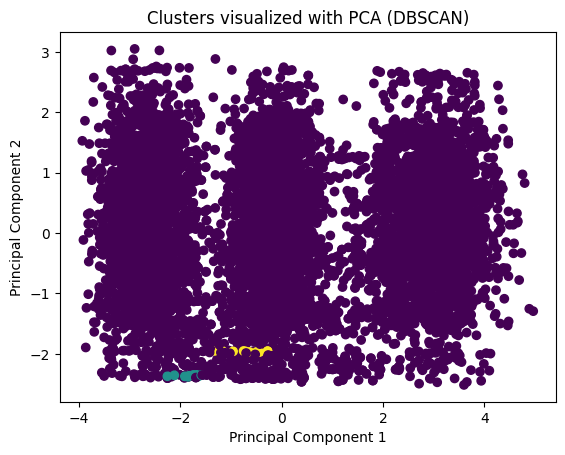

In [25]:
# --- Visualize the clusters with PCA ---

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_encoded['cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters visualized with PCA (DBSCAN)')
plt.show()


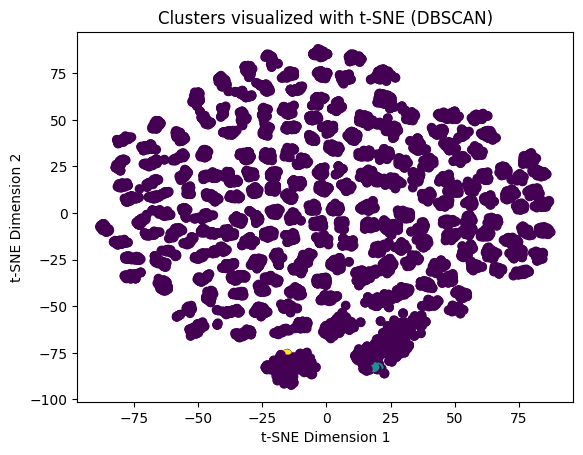

In [26]:
# --- Visualize the clusters with t-SNE ---

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_encoded['cluster'])
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clusters visualized with t-SNE (DBSCAN)')
plt.show()



In [27]:
# --- Evaluate the clustering ---
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Filter out noise points for Silhouette Score calculation
X_filtered = X_scaled[df_encoded['cluster'] != -1]
labels_filtered = df_encoded['cluster'][df_encoded['cluster'] != -1]

if n_clusters_ > 1:  # Silhouette Score needs at least 2 clusters
    silhouette_avg = silhouette_score(X_filtered, labels_filtered)
    print(f"Silhouette Score: {silhouette_avg}")
    
    db_index = davies_bouldin_score(X_filtered, labels_filtered)
    print(f"Davies-Bouldin Index: {db_index}")

    ch_index = calinski_harabasz_score(X_filtered, labels_filtered)
    print(f"Calinski-Harabasz Index: {ch_index}")


Silhouette Score: 0.701210224893016
Davies-Bouldin Index: 0.42995643594582755
Calinski-Harabasz Index: 120.06099394575342
